In [2]:
from IPython.core.interactiveshell import InteractiveShell  #执行该代码可以使得当前nb支持多输出
InteractiveShell.ast_node_interactivity = "all" 
import numpy as np
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, LSTM
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

pd.options.display.max_rows = 8  
%matplotlib inline

确定训练集，验证集和测试集的日期

In [3]:
national_debt = pd.read_csv('data/national_debt_5y.csv',index_col = 0,encoding = 'gb2312')  # 读取股票文件
national_debt.head()
national_debt.describe()

national_debt['涨跌幅'] = national_debt['涨跌幅'].str.strip("%").astype(float)/100
national_debt.head()

,开盘,收盘,高,低,涨跌幅
日期,,,,,
2016/1/21,2.683,2.700,2.703,2.680,0.78%
2016/1/22,2.705,2.689,2.705,2.682,-0.41%
2016/1/25,2.750,2.694,2.750,2.680,0.19%
2016/1/26,2.703,2.738,2.740,2.690,1.63%
2016/1/27,2.763,2.774,2.783,2.763,1.31%


,开盘,收盘,高,低
count,1563.000000,1563.000000,1563.000000,1563.000000
mean,3.041862,3.022280,3.049060,3.010074
std,0.419688,0.420101,0.418939,0.420670
min,1.740000,1.740000,1.740000,1.740000
25%,2.746000,2.712000,2.750000,2.697000
50%,3.012000,2.993000,3.018000,2.983000
75%,3.261000,3.234000,3.269000,3.219000
max,4.000000,3.968000,4.000000,3.952000


,开盘,收盘,高,低,涨跌幅
日期,,,,,
2016/1/21,2.683,2.700,2.703,2.680,0.0078
2016/1/22,2.705,2.689,2.705,2.682,-0.0041
2016/1/25,2.750,2.694,2.750,2.680,0.0019
2016/1/26,2.703,2.738,2.740,2.690,0.0163
2016/1/27,2.763,2.774,2.783,2.763,0.0131


In [7]:
national_debt.iloc[0,0:]
national_debt.iloc[1563 - 600,0:]
national_debt.iloc[1563 - 300,0:]
national_debt.iloc[1562,0:]

开盘     2.6830
收盘     2.7000
高      2.7030
低      2.6800
涨跌幅    0.0078
Name: 2016/1/21, dtype: float64

开盘     2.9660
收盘     2.9630
高      2.9660
低      2.9580
涨跌幅   -0.0007
Name: 2019/9/27, dtype: float64

开盘     3.168
收盘     3.105
高      3.168
低      3.098
涨跌幅   -0.008
Name: 2020/12/10, dtype: float64

开盘     2.500
收盘     2.506
高      2.520
低      2.497
涨跌幅    0.000
Name: 2022/2/21, dtype: float64

将多张图片合为一张

In [3]:
import PIL.Image as Image
import os

IMAGES_PATH = r'img/combine/'  # 图片集来源地址
IMAGES_FORMAT = ['.png']  # 图片格式'.jpg', '.JPG'
IMAGE_SIZE = 1000  # 每张小图片的大小
IMAGE_ROW = 2  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 2  # 图片间隔，也就是合并成一张图后，一共有几列
IMAGE_SAVE_PATH = r'img/combine/pred_combine.png'  # 图片转换后的地址

# 获取图片集地址下的所有图片名称
image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if
               os.path.splitext(name)[1] == item]

# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")


# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图


image_compose()  # 调用函数这里插入代码片

作出常见激活函数的图像

Text(6.283185307179586, 0.1, 'x')

Text(-0.5, 1.0, 'y')

(-10, 10)

(-0.2, 1)

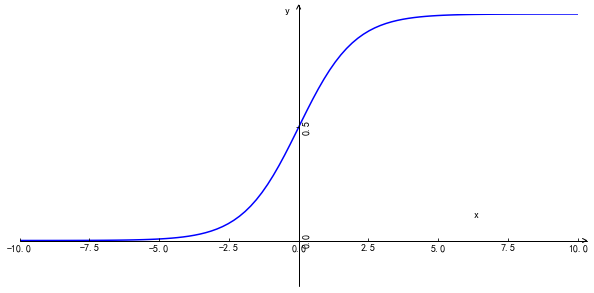

In [39]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_toolkits.axisartist as axisartist #导入坐标轴加工模块

fig=plt.figure(figsize=(10,5)) #新建画布
ax=axisartist.Subplot(fig,111) #使用axisartist.Subplot方法创建一个绘图区对象ax
fig.add_axes(ax) #将绘图区对象添加到画布中

ax.axis[:].set_visible(False) #隐藏原来的实线矩形

ax.axis["x"]=ax.new_floating_axis(0,0,axis_direction="bottom") #添加x轴
ax.axis["y"]=ax.new_floating_axis(1,0,axis_direction="bottom") #添加y轴

ax.axis["x"].set_axisline_style("->",size=1.0) #给x坐标轴加箭头
ax.axis["y"].set_axisline_style("->",size=1.0) #给y坐标轴加箭头
ax.annotate(s='x' ,xy=(2*math.pi,0) ,xytext=(2*math.pi,0.1)) #标注x轴
ax.annotate(s='y' ,xy=(0,1.0) ,xytext=(-0.5,1.0)) #标注y轴

plt.xlim(-10, 10) #设置横坐标范围
plt.ylim(-0.2, 1) #设置纵坐标范围
# ax.set_xticks([]) #设置x轴刻度
ax.set_yticks([0, 0.5, 1]) #设置y轴刻度

# 手写 sigmoid 函数,
# def sigmoid(x): 
#     return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100) 
# 直接调用tf.nn.sigmoid(x)
plt.plot(x,tf.nn.sigmoid(x),color="blue")
plt.show() 

Text(6.283185307179586, 0.1, 'x')

Text(-0.5, 1.0, 'y')

(-10, 10)

(-1, 1)

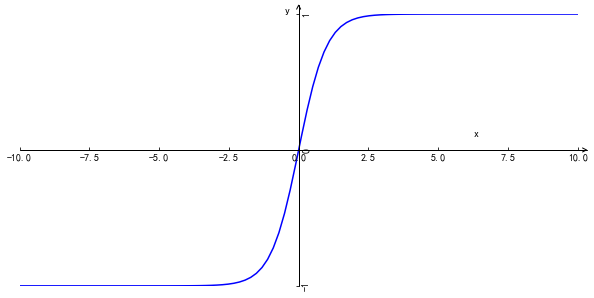

In [40]:
fig=plt.figure(figsize=(10,5)) #新建画布
ax=axisartist.Subplot(fig,111) #使用axisartist.Subplot方法创建一个绘图区对象ax
fig.add_axes(ax) #将绘图区对象添加到画布中

ax.axis[:].set_visible(False) #隐藏原来的实线矩形

ax.axis["x"]=ax.new_floating_axis(0,0,axis_direction="bottom") #添加x轴
ax.axis["y"]=ax.new_floating_axis(1,0,axis_direction="bottom") #添加y轴

ax.axis["x"].set_axisline_style("->",size=1.0) #给x坐标轴加箭头
ax.axis["y"].set_axisline_style("->",size=1.0) #给y坐标轴加箭头
ax.annotate(s='x' ,xy=(2*math.pi,0) ,xytext=(2*math.pi,0.1)) #标注x轴
ax.annotate(s='y' ,xy=(0,1.0) ,xytext=(-0.5,1.0)) #标注y轴

plt.xlim(-10, 10) #设置横坐标范围
plt.ylim(-1, 1) #设置纵坐标范围
# ax.set_xticks([]) #设置x轴刻度
ax.set_yticks([-1, 0, 1]) #设置y轴刻度


# def tanh(x): 
#     return 2*sigmoid(2*x)-1

x = np.linspace(-10, 10, 100) 

plt.plot(x,tf.nn.tanh(x),color="blue")
plt.show() 

Text(6.283185307179586, 0.1, 'x')

Text(-0.5, 1.0, 'y')

(-10, 10)

(-5, 10)

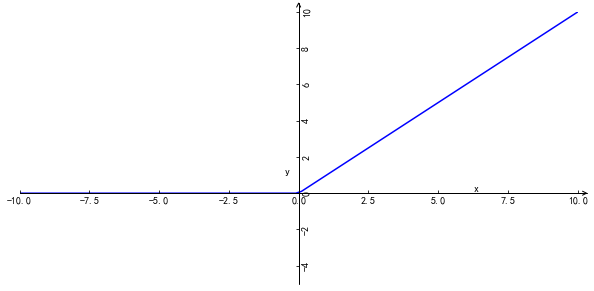

In [42]:
fig=plt.figure(figsize=(10,5)) #新建画布
ax=axisartist.Subplot(fig,111) #使用axisartist.Subplot方法创建一个绘图区对象ax
fig.add_axes(ax) #将绘图区对象添加到画布中

ax.axis[:].set_visible(False) #隐藏原来的实线矩形

ax.axis["x"]=ax.new_floating_axis(0,0,axis_direction="bottom") #添加x轴
ax.axis["y"]=ax.new_floating_axis(1,0,axis_direction="bottom") #添加y轴

ax.axis["x"].set_axisline_style("->",size=1.0) #给x坐标轴加箭头
ax.axis["y"].set_axisline_style("->",size=1.0) #给y坐标轴加箭头
ax.annotate(s='x' ,xy=(2*math.pi,0) ,xytext=(2*math.pi,0.1)) #标注x轴
ax.annotate(s='y' ,xy=(0,1.0) ,xytext=(-0.5,1.0)) #标注y轴

plt.xlim(-10, 10) #设置横坐标范围
plt.ylim(-5, 10) #设置纵坐标范围
# ax.set_xticks([]) #设置x轴刻度
#ax.set_yticks([-1, 0, 1]) #设置y轴刻度

def relu(x): 
    return np.where(x >= 0, x, 0)

x = np.linspace(-10, 10, 100) 

plt.plot(x,relu(x),color="blue")
plt.show() 